## classifying movie reviews: binary classification

### loading IMDB dataset

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


### training recurrent network: base LSTM

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,  #default: epochs=10
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 200s 1s/step - loss: 0.5344 - acc: 0.7389 - val_loss: 0.3687 - val_acc: 0.8546
Epoch 2/10
157/157 [==============================] - 406s 3s/step - loss: 0.3022 - acc: 0.8805 - val_loss: 0.2824 - val_acc: 0.8874
Epoch 3/10
157/157 [==============================] - 456s 3s/step - loss: 0.2374 - acc: 0.9094 - val_loss: 0.3325 - val_acc: 0.8806
Epoch 4/10
157/157 [==============================] - 413s 3s/step - loss: 0.2025 - acc: 0.9247 - val_loss: 0.3477 - val_acc: 0.8560
Epoch 5/10
157/157 [==============================] - 387s 2s/step - loss: 0.1730 - acc: 0.9374 - val_loss: 0.2972 - val_acc: 0.8852
Epoch 6/10
157/157 [==============================] - 238s 2s/step - loss: 0.1611 - acc: 0.9410 - val_loss: 0.3044 - val_acc: 0.8902
Epoch 7/10
157/157 [==============================] - 267s 2s/step - loss: 0.1432 - acc: 0.9510 - val_loss: 0.3649 - val_acc: 0.8812
Epoch 8/10
157/157 [==============================] - 322s 2s/step - 

### evaluating model

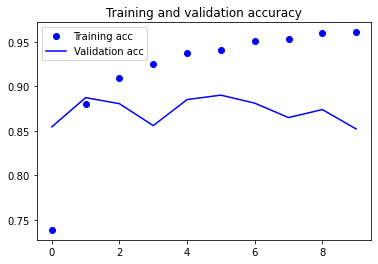

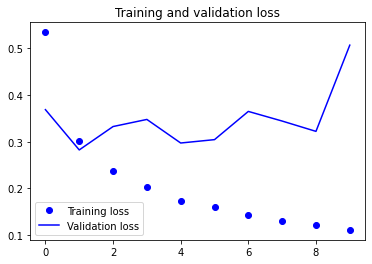

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [6]:
import numpy as np
np.argmax(val_acc)+1

6

In [8]:
round(val_acc[np.argmax(val_acc)],2)

0.89